In [1]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#Loading WR-List

List = pd.read_csv('RanglisteLOM21.csv', delimiter=';')
WR21_m = pd.read_csv('WRmen0222.csv', delimiter=';')

In [3]:
List.tail(10)

,Ranking,Name,Jg,City,Club,Time
37,38,Patrick Kraehenbuehl,95,Wabern,OLG Herzogenbuchsee,01:51:26
38,39,Luca Zingg,93,Oberarth,OL Amriswil,01:53:19
39,40,Fabio Alfieri,84,Pedrinate,SCOM Mendrisio,01:54:00
40,41,Sven Klein,93,Hittnau,OLG Pf�ffikon,01:54:43
41,42,Philipp Khlebnikov,95,Neuch�tel,ANCO,01:56:47
42,43,Lorenz Widmer,95,Seengen,bussola ok,02:00:10
43,44,Sandro Anderes,97,Gretzenbach,OL Regio Olten,02:00:20
44,45,Simon Jakob,91,Z�rich,OLK Rafzerfeld,02:03:05
45,46,Benjamin Walti,97,Hendschiken,OLK Argus,02:06:59
46,47,Florian Wepfer,99,Wetzikon ZH,OLG Pf�ffikon,02:19:53


In [35]:
WR21_m.head()

,IOF ID,First Name,Last Name,Country,WRS Position,WRS points,WRS events,Avg point
0,23855,Kasper,Harlem Fosser,NOR,1,7038,5,1407.6
1,7562,Gustav,Bergman,SWE,2,7036,5,1407.2
2,12305,Matthias,Kyburz,SUI,3,6992,5,1398.4
3,13003,Olav,Lundanes,NOR,4,6974,5,1394.8
4,10849,Daniel,Hubmann,SUI,5,6969,5,1393.8


In [4]:
len(WR21_m), len(List)

(2934, 47)

In [5]:
new_list = pd.merge(List, WR21_m, on='Name')


In [6]:
print(len(new_list))
new_list

47


,Ranking,Name,Jg,City,Club,Time,IOF ID,Country,WRS Position,WRS points,WRS events,Avg point
0,1,Matthias Kyburz,90,Liebefeld,OLK Fricktal,01:20:24,12305,SUI,3,6992,5,1398.4
1,2,Daniel Hubmann,83,Bremgarten b. Bern,OL Regio Wil,01:20:44,10849,SUI,5,6969,5,1393.8
2,3,Martin Hubmann,89,Eschlikon TG,OL Regio Wil,01:20:45,10851,SUI,21,6795,5,1359.0
3,4,Pascal Buchs,97,Les Hauts-Geneveys,ANCO,01:25:07,23883,SUI,54,6572,5,1314.4
4,5,Joey Hadorn,97,Fahrni b. Thun,ol norska,01:25:44,23033,SUI,10,6898,5,1379.6
5,6,Noah Zbinden,96,M�nchenstein,OLV Baselland,01:26:28,18899,SUI,64,6529,5,1305.8
6,7,Florian Schneider,93,Wattenwil,ol norska,01:26:44,15991,SUI,84,6440,5,1288.0
7,8,Tino Polsini,99,Gelterkinden,OLV Baselland,01:26:47,28365,SUI,102,6375,5,1275.0
8,9,Riccardo Rancan,96,Uster,OLG Pf�ffikon,01:26:52,18900,SUI,106,6363,5,1272.6
9,10,Marc Lauenstein,80,Cormondr�che,ANCO,01:27:11,12501,SUI,126,6314,5,1262.8


In [7]:
from datetime import datetime

def get_min(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 60 + int(m)  + int(s)/60

In [8]:
for n in range(len(new_list)):
    new_list['Time'][n]= get_min(new_list['Time'][n])
    

<ipython-input-8-369a79757d1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list['Time'][n]= get_min(new_list['Time'][n])


In [9]:
new_list.head()

,Ranking,Name,Jg,City,Club,Time,IOF ID,Country,WRS Position,WRS points,WRS events,Avg point
0,1,Matthias Kyburz,90,Liebefeld,OLK Fricktal,80.4,12305,SUI,3,6992,5,1398.4
1,2,Daniel Hubmann,83,Bremgarten b. Bern,OL Regio Wil,80.733333,10849,SUI,5,6969,5,1393.8
2,3,Martin Hubmann,89,Eschlikon TG,OL Regio Wil,80.75,10851,SUI,21,6795,5,1359.0
3,4,Pascal Buchs,97,Les Hauts-Geneveys,ANCO,85.116667,23883,SUI,54,6572,5,1314.4
4,5,Joey Hadorn,97,Fahrni b. Thun,ol norska,85.733333,23033,SUI,10,6898,5,1379.6


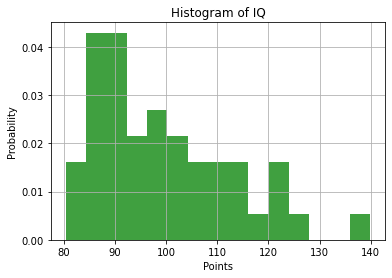

In [10]:
x1 = new_list['Avg point']
x2 = new_list['Time']
# the histogram of the data
n, bins, patches = plt.hist(x2, 15, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Points')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(100, 2000)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [11]:
sdp = new_list['Avg point'].std()
mp = new_list['Avg point'].mean()
sdt = new_list['Time'].std()
mt = new_list['Time'].mean()

mp, sdp, mt, sdt

(1216.2680851063828, 109.42787600174587, 99.25531914893615, 13.558960576417276)

In [12]:
#max of points to be achieved 
max_points = 1400
corr = max_points / (mp + (sdp*((mt - new_list['Time'][0])/sdt)))
if corr > 1:
    corr = 1
else:
    corr = corr
corr

1

In [13]:

def WRE_points(t, mt, mp, sdp, sdt, corr):
    points = (mp + (sdp*((mt - t)/sdt)))*corr
    return points


In [14]:
new_points = []

for t in new_list['Time']:
    new_points.append(round(WRE_points(t, mt, mp, sdp, sdt, corr)))

In [15]:
new_list['new_points'] = new_points

In [16]:
new_list

,Ranking,Name,Jg,City,Club,Time,IOF ID,Country,WRS Position,WRS points,WRS events,Avg point,new_points
0,1,Matthias Kyburz,90,Liebefeld,OLK Fricktal,80.4,12305,SUI,3,6992,5,1398.4,1368
1,2,Daniel Hubmann,83,Bremgarten b. Bern,OL Regio Wil,80.733333,10849,SUI,5,6969,5,1393.8,1366
2,3,Martin Hubmann,89,Eschlikon TG,OL Regio Wil,80.75,10851,SUI,21,6795,5,1359.0,1366
3,4,Pascal Buchs,97,Les Hauts-Geneveys,ANCO,85.116667,23883,SUI,54,6572,5,1314.4,1330
4,5,Joey Hadorn,97,Fahrni b. Thun,ol norska,85.733333,23033,SUI,10,6898,5,1379.6,1325
5,6,Noah Zbinden,96,M�nchenstein,OLV Baselland,86.466667,18899,SUI,64,6529,5,1305.8,1319
6,7,Florian Schneider,93,Wattenwil,ol norska,86.733333,15991,SUI,84,6440,5,1288.0,1317
7,8,Tino Polsini,99,Gelterkinden,OLV Baselland,86.783333,28365,SUI,102,6375,5,1275.0,1317
8,9,Riccardo Rancan,96,Uster,OLG Pf�ffikon,86.866667,18900,SUI,106,6363,5,1272.6,1316
9,10,Marc Lauenstein,80,Cormondr�che,ANCO,87.183333,12501,SUI,126,6314,5,1262.8,1314


In [17]:
new_list[['Name','new_points']]

,Name,new_points
0,Matthias Kyburz,1368
1,Daniel Hubmann,1366
2,Martin Hubmann,1366
3,Pascal Buchs,1330
4,Joey Hadorn,1325
5,Noah Zbinden,1319
6,Florian Schneider,1317
7,Tino Polsini,1317
8,Riccardo Rancan,1316
9,Marc Lauenstein,1314


## Fit Distribution

In [28]:
!pip install fitter

  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25015 sha256=53f826f46e462ef5da6ae397eb810efdf71777c5448fd7ac7891b9c12598224e
  Stored in directory: c:\users\m1hb\appdata\local\pip\cache\wheels\3b\8e\cb\505518075a659232287a9689543b465e2dd9fa662ac8fc8086
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64216 sha256=1f37636a69ba77f769d28a34a102e6fda544ffd66c8355883986da4e3c77cd0b
  Stored in directory: c:\users\m1hb\appdata\local\pip\cache\wheels\e2\47\9f\de01f291cfde341b33383bcf1292b17d64c700d4a12b318a7d
Successfully built fitter easydev


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [47]:
data = WR21_m['Avg point'].values[WR21_m['Avg point'].values >20]
data1 = new_list['Avg point'].values

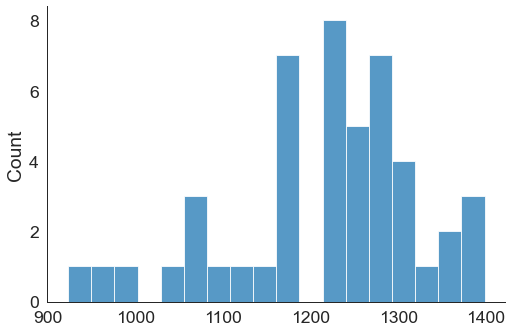

In [48]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data1,  kind="hist", bins = 18, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
cauchy,inf,inf,inf,inf
chi2,inf,inf,inf,inf
exponpow,inf,inf,inf,inf
expon,inf,inf,inf,inf
gamma,inf,inf,inf,inf


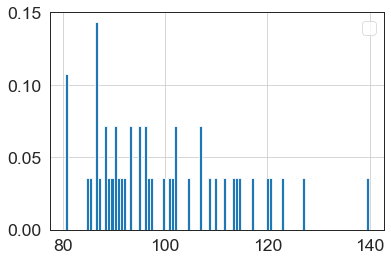

In [32]:
f = Fitter(data1,
           distributions= get_common_distributions())
f.fit()
f.summary()

1407.6


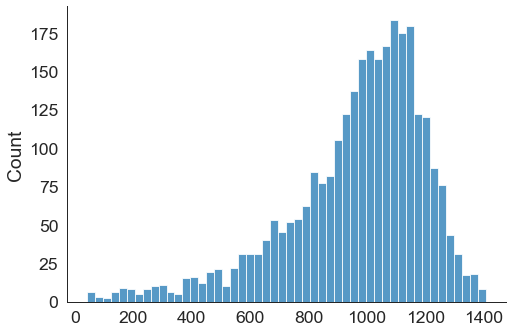

In [50]:
# Data Preparing
data = WR21_m['Avg point'].values[WR21_m['Avg point'].values >20]
print(data.max())





sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data,  kind="hist", bins = 50, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
genlogistic,0.000002,1591.311453,-61560.228186,inf
gumbel_l,0.000002,1602.128567,-60682.545333,inf
laplace_asymmetric,0.000004,1586.700781,-59199.174975,inf
dweibull,0.000007,1647.646682,-57761.018349,inf
dgamma,0.000007,1645.563287,-57718.033028,inf


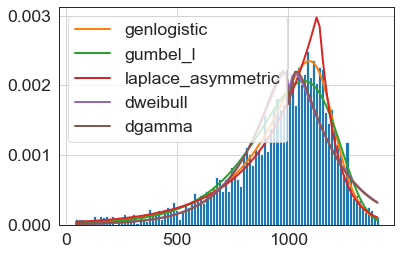

In [54]:
##Fit the Data

import warnings
warnings.filterwarnings("ignore")

f = Fitter(data)
f.fit()
f.summary()



In [23]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

,sumsquare_error,aic,bic,kl_div
cauchy,0.000009,1631.284631,-56980.041025,inf
norm,0.000012,1662.579405,-55956.647582,inf
lognorm,0.000013,1664.671360,-55868.344918,inf
gamma,0.000014,1663.228825,-55572.037007,inf
chi2,0.000016,1669.644770,-55312.988531,inf


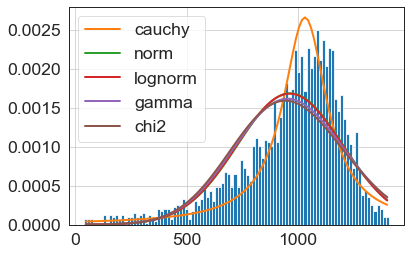

In [38]:
f = Fitter(data,
           distributions= get_common_distributions())
f.fit()
f.summary()

In [39]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 1031.289565795223, 'scale': 119.75963294943877}}

In [40]:
f.fitted_param["cauchy"]

(1031.289565795223, 119.75963294943877)